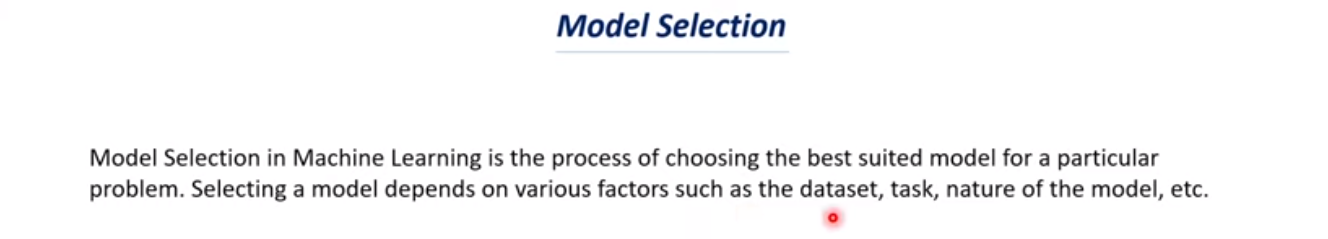

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
heartdata = pd.read_csv("heart.csv")

In [3]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = heartdata.drop("target",axis = 1)

In [6]:
Y = heartdata["target"]

In [7]:
X = np.array(X)
Y = np.array(Y)

# MODEL SELECTION

In [8]:
models = [LogisticRegression(max_iter = 1000),SVC(kernel = "linear"),KNeighborsClassifier(),RandomForestClassifier(random_state =42)]

In [34]:
for model in models:
    cv_score = cross_val_score(model,X,Y,cv = 5)
    mean_acuracy = sum(cv_score)/len(cv_score)
    mean_acuracy = mean_acuracy * 100
    mean_acuracy = round(mean_acuracy,2)
    
    print("Cross Validation for the model",model,"=",cv_score)
    print("Accuracy score of the model","=",mean_acuracy)
    print("___________________________________________________________________")
    print()

Cross Validation for the model LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy score of the model = 82.83
___________________________________________________________________

Cross Validation for the model SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy score of the model = 82.83
___________________________________________________________________

Cross Validation for the model KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy score of the model = 64.39
___________________________________________________________________

Cross Validation for the model RandomForestClassifier(random_state=42) = [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Accuracy score of the model = 83.82
___________________________________________________________________



***As you can see the Random Forest has the highest accuracy on this data so we chose this model and fit data on that model***

In [36]:
RF = RandomForestClassifier(random_state = 42)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

In [39]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = RF.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.8360655737704918